### [Look Deeper - Anscombe's quartet](https://www.coursera.org/learn/data-analysis-r/lecture/Rf92j/same-data-different-outcome)

**[Pandas Comparison with R](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_r.html)**

In R:
```
install.packages('Tmisc')
library(Tmisc)
data(quartet)
view(quartet)
```

In [3]:
import seaborn as sns
import pandas as pd

anscombe = sns.load_dataset("anscombe")
anscombe.head()


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Summarize dataset in R:
```
quartet %>%
  group_by(set) %>%
  summarize(mean(x), sd(x), mean(y), sd(y), cor(x,y))
```

In [4]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [5]:
# describe doesn't include correlations like in R's summarize, so:
anscombe.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


Only looking at summarized data, all 4 datasets look the same. Here's where plotting help us see the difference:
```
ggplot(quartet, aes(x,y)) + geom_point() + geom_smooth(method=lm, se=FALSE) + facet_wrap(-set)
```

<AxesSubplot:xlabel='x', ylabel='y'>

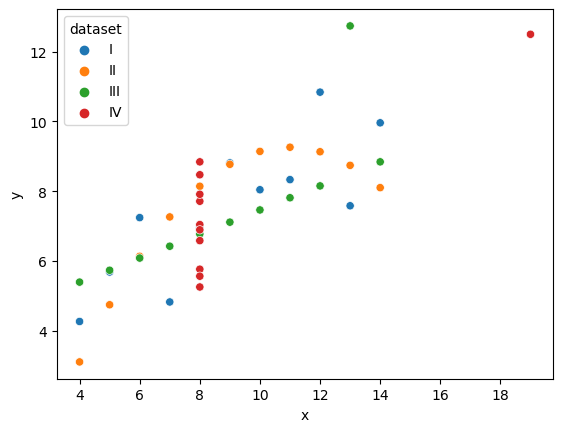

In [6]:
sns.scatterplot(data=anscombe, x='x', y='y', hue='dataset')

<AxesSubplot:>

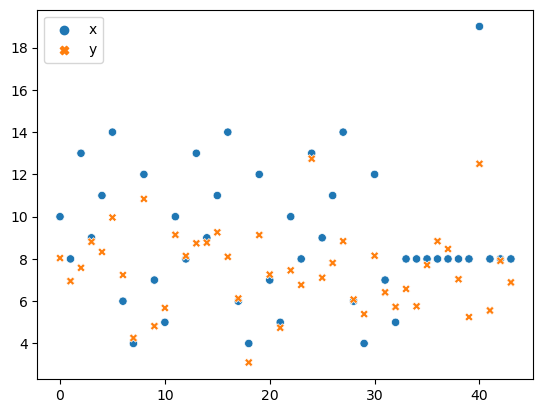

In [12]:
sns.scatterplot(data=anscombe)